In [2]:
%run ./utility.ipynb

# LDA

In [3]:
lda = LinearDiscriminantAnalysis()

## Random parameter search

In [4]:
solver=['svd', 'lsqr', 'eigen']
shrinkage=["auto", None]

random_grid = {
    "solver":solver,
    "shrinkage":shrinkage
}

In [5]:
lda_random = RandomizedSearchCV(estimator=lda, param_distributions=random_grid, n_iter=100, cv=5, verbose=0, random_state=42, n_jobs=-1)
lda_random.fit(X_train, y_train)

c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Arne\anaconda3\envs\m

RandomizedSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'shrinkage': ['auto', None],
                                        'solver': ['svd', 'lsqr', 'eigen']},
                   random_state=42)

In [6]:
lda_random.best_params_

{'solver': 'lsqr', 'shrinkage': 'auto'}

In [10]:
out = pd.DataFrame(lda_random.cv_results_)
out['param_shrinkage'].fillna("None", inplace=True)

Text(0.5, 1.0, 'shrinkage')

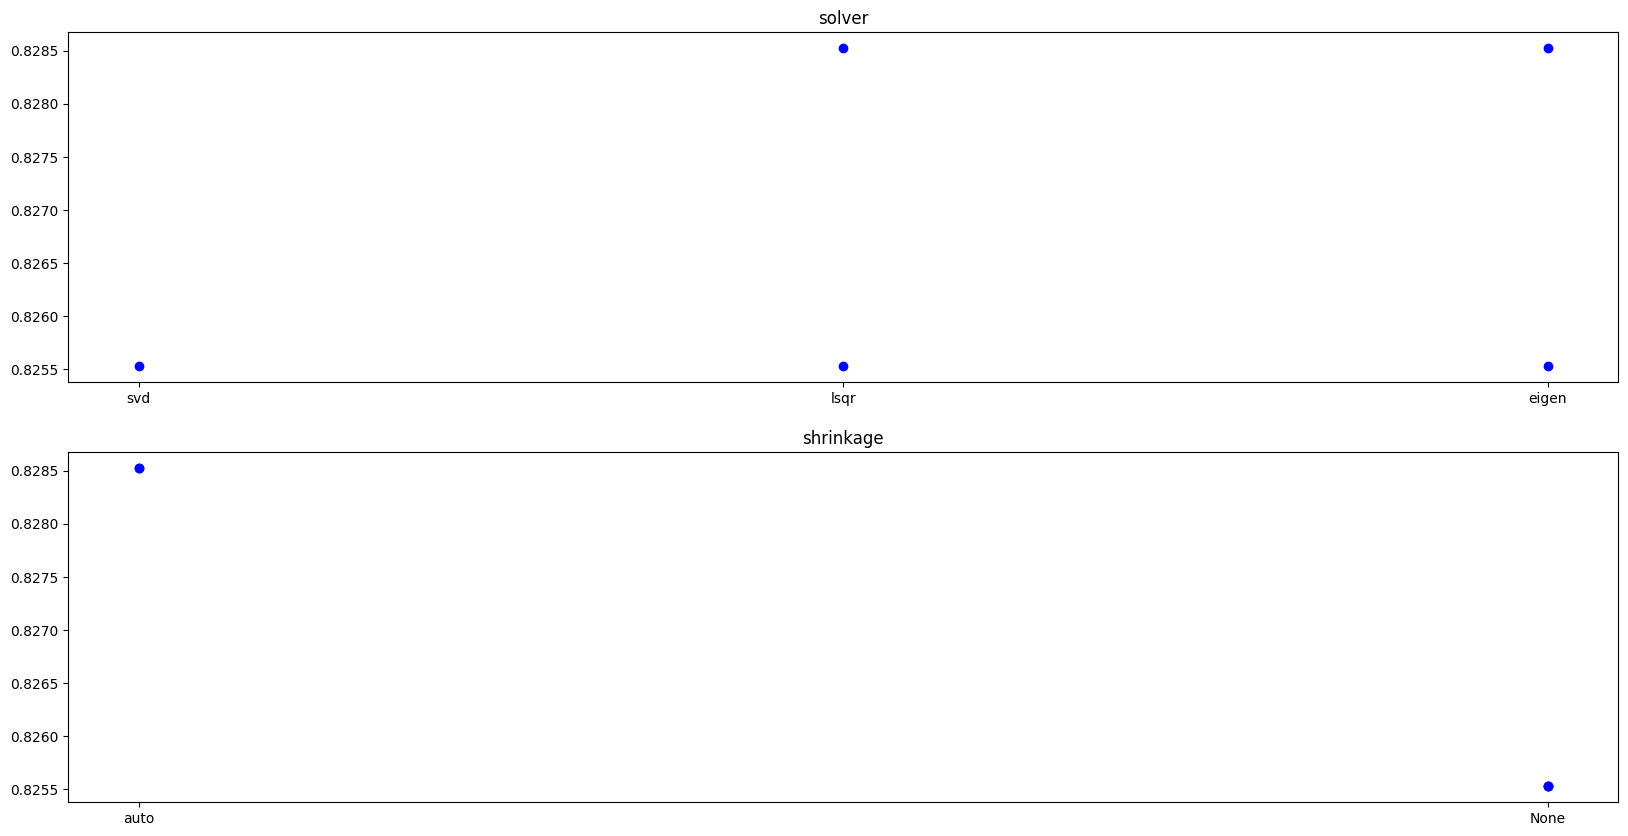

In [11]:
xlabel_names = ["param_solver","param_shrinkage"]
fig, axs = plt.subplots(2,1, figsize=(20,10))

axs[0].scatter(out['param_solver'], out['mean_test_score'], c='blue');
axs[0].set_title('solver')

axs[1].scatter(out['param_shrinkage'], out['mean_test_score'], c='blue');
axs[1].set_title('shrinkage')

## Grid search

In [12]:
solver=['lsqr', 'eigen']
shrinkage=["auto"]

param_grid = {
    "solver":solver,
    "shrinkage":shrinkage
}

In [14]:
lda_grid = GridSearchCV(estimator=lda, param_grid=param_grid, cv= 5, verbose=0, n_jobs=-1)
lda_grid.fit(X_train, y_train)
best_params = lda_grid.best_params_

c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
best_params

{'shrinkage': 'auto', 'solver': 'lsqr'}

In [16]:
lda_best = lda_grid.best_estimator_

In [19]:
cv_scores = cross_val_score(lda_best, X_train, y_train, cv=5)
print(cv_scores, np.mean(cv_scores))

[0.61864407 0.83702738 0.90221643 0.88584475 0.89889106] 0.8285247373940198


c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expec

# Saving model

In [20]:
dump(lda_best, "./models/lda_best.joblib")

['./models/lda_best.joblib']